## Simple example for the Deutsch algorithm

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

#### Building the circuit of the functions

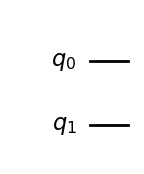

In [2]:
f_constant_0 = QuantumCircuit(2)

f_constant_0.draw('mpl')

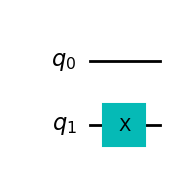

In [3]:
f_constant_1 = QuantumCircuit(2)
f_constant_1.x(1)

f_constant_1.draw('mpl')

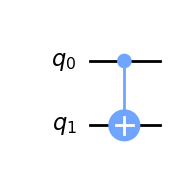

In [5]:
f_equals_x = QuantumCircuit(2)

f_equals_x.cx(0,1)
f_equals_x.draw('mpl')

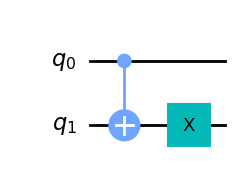

In [7]:
f_equals_not_x = QuantumCircuit(2)

f_equals_not_x.cx(0,1)
f_equals_not_x.x(1)

f_equals_not_x.draw('mpl')

In [42]:
## Let's build the full circuit for all cases

initial_parallel_H = QuantumCircuit(2)
initial_parallel_H.h(0)
initial_parallel_H.x(1)
initial_parallel_H.h(1)
initial_parallel_H.barrier()

final_single_H = QuantumCircuit(2)
final_single_H.barrier()
final_single_H.h(0)

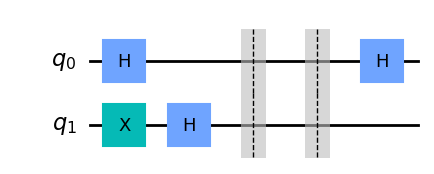

In [43]:
f_constant_0_deutsch = initial_parallel_H.compose(f_constant_0).compose(final_single_H)
f_constant_0_deutsch.draw('mpl')

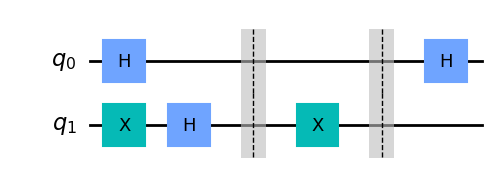

In [44]:
f_constant_1_deutsch = initial_parallel_H.compose(f_constant_1).compose(final_single_H)
f_constant_1_deutsch.draw('mpl')

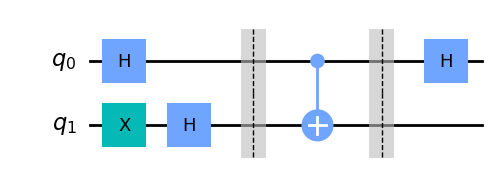

In [45]:
f_equals_x_deutsch = initial_parallel_H.compose(f_equals_x).compose(final_single_H)
f_equals_x_deutsch.draw('mpl')

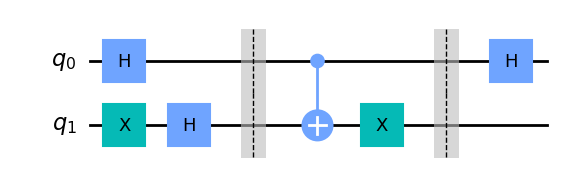

In [46]:
f_equals_not_x_deutsch = initial_parallel_H.compose(f_equals_not_x).compose(final_single_H)
f_equals_not_x_deutsch.draw('mpl')

## Simulating circuits

In [47]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

## Constant functions

In [48]:
job = backend.run(f_constant_0_deutsch)
result = job.result()
outputstate = result.get_statevector(f_constant_0_deutsch, decimals=3)

print(outputstate)

Statevector([ 0.707-0.j,  0.   +0.j, -0.707+0.j,  0.   -0.j],
            dims=(2, 2))


In [49]:
# We can compute the probability of measuring 0 or 1 based on the statevector, for qubit 0
outputstate.probabilities(qargs=[0])

array([0.999698, 0.      ])

In [50]:
# For qubit 1 we can see that we are still in a superposition
outputstate.probabilities(qargs=[1])

array([0.499849, 0.499849])

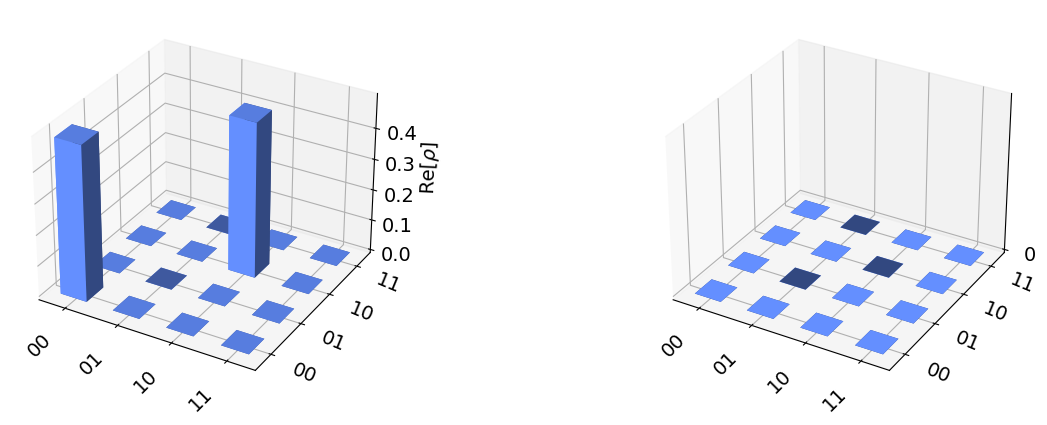

In [51]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [52]:
### The same holds for the other constant function

job = backend.run(f_constant_1_deutsch)
result = job.result()
outputstate = result.get_statevector(f_constant_1_deutsch, decimals=3)

print(outputstate)

Statevector([-0.707+0.j,  0.   -0.j,  0.707-0.j,  0.   +0.j],
            dims=(2, 2))


In [53]:
outputstate.probabilities(qargs=[0])

array([0.999698, 0.      ])

Now let's add a measurement

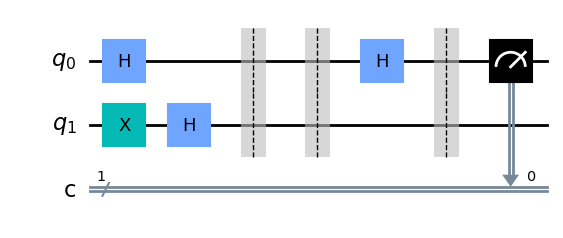

In [54]:
# Create a second part of the quantum circuit that contains only the measurements
measurements = QuantumCircuit(2, 1)

measurements.barrier()
measurements.measure(qubit = [0], cbit = [0])

f_constant_0_deutsch.add_register(measurements.cregs[0])
f_constant_0_deutsch = f_constant_0_deutsch.compose(measurements)

#drawing the circuit
f_constant_0_deutsch.draw('mpl')

In [55]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
job_sim = backend_sim.run(transpile(f_constant_0_deutsch, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(f_constant_0_deutsch)
print(counts)

{'0': 1024}


## Balanced functions

In [56]:
job = backend.run(f_equals_x_deutsch)
result = job.result()
outputstate = result.get_statevector(f_equals_x_deutsch, decimals=3)

print(outputstate)

Statevector([ 0.   +0.j,  0.707-0.j, -0.   -0.j, -0.707+0.j],
            dims=(2, 2))


In [57]:
# We can compute the probability of measuring 0 or 1 based on the statevector, for qubit 0
outputstate.probabilities(qargs=[0])

array([0.      , 0.999698])

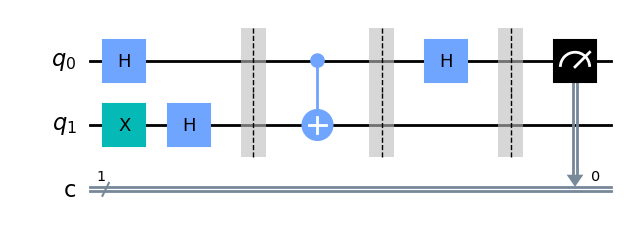

In [58]:
f_equals_x_deutsch.add_register(measurements.cregs[0])
f_equals_x_deutsch = f_equals_x_deutsch.compose(measurements)

#drawing the circuit
f_equals_x_deutsch.draw('mpl')

In [59]:
# Execute the circuit on the qasm simulator.
job_sim = backend_sim.run(transpile(f_equals_x_deutsch, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(f_equals_x_deutsch)
print(counts)

{'1': 1024}
